# Performance of `evolution`
## Cutoff in the coefficients

The time evolution operator for a Hamiltonian $H$
$$ O[H, \Delta t] =  \text{exp}\left(-i H \Delta t\right) $$
uses a KPM expansion as a function of time $\Delta t$, instead of the usual Fermi energy $\varepsilon$ of spectral functions.

In the expansion 
$$ O[H, \Delta t] = \sum_{m=0}^{\infty} T_m(H) c_m(\Delta t)$$
the coefficients $c_m$ are proportional to the Bessel functions of the first kind of order $m$, so they decay exponentially fast after a certain threshold $m^*$.

Thus, is it extremely efficient to cutoff the expansion for a certain target accuracy
$$ O[H, \Delta t] \simeq \sum_{m=0}^{m^*} T_m(H) c_m(\Delta t)$$

The exact value of $m^*$ depends on the time step times the bounds of the spectrum $\Delta t\times\Delta E$, and on the desired accuracy.
To find $m^*$ for all values of $\Delta t\times\Delta E$, we define a few typical target accuracies: $10^{-8}, 10^{-16}, 10^{-32}$, and numerically obtain the answer. 
Then, we will use a numerical estimate of the function that fits $m^*$.

In [1]:
import numpy as np
import holoviews as hv
hv.extension()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
import scipy
import scipy.optimize
from scipy.special import jv

In [3]:
from kpm_tools.evolution import coef_evo


## numerical evaluation of the coefficients

First, we obtain an `ndarray` of the coefficients vs the time delta $\Delta t$ and the number of moments `num_moments`.

Here, we use $\Delta E = 1$, such that `dt` is the rescaled time delta $\Delta t \times \Delta E$. 

In [4]:
dt_array = np.logspace(-3,2,1000)
num_moments = 500

In [5]:
coefs_array = np.array([
    coef_evo(num_moments, 0, ab=(2,0), delta_time=dt)
    for dt in dt_array
])
coefs_array = coefs_array[:,1:,0]

In [6]:
num_moments_array = np.arange(1, num_moments)

## make a fit

### Numerical estimation of the best `num_moments`
Then we obtain the best `num_moments` for a given `dt` and `accuracy`.

In [7]:
accuracy = 1e-16

In [8]:
# get the transition point in `m` such that coefs are smaller than accuracy

def max_m_array(coefs_array, accuracy):
    return np.count_nonzero(np.abs(coefs_array) > accuracy, axis=1)

/tmp/ipykernel_21141/785646435.py:5: RuntimeWarning: divide by zero encountered in log
  np.log(np.abs(coefs_array))/np.log(10)


:Overlay
   .QuadMesh.I :QuadMesh   [M,$dt$]   (z)
   .Curve.I    :Curve   [x]   (y)
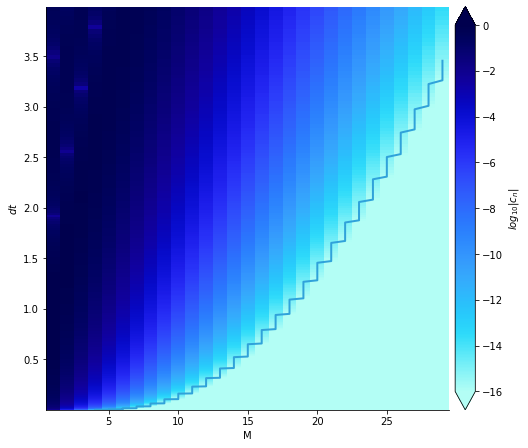

In [9]:
(
    hv.QuadMesh((
        num_moments_array,
        dt_array,
        np.log(np.abs(coefs_array))/np.log(10)
    ),
        kdims=['M', '$dt$'],
        vdims=hv.Dimension('z', label='${log}_{10}|c_n|$', range=(np.log(accuracy)/np.log(10), 0))
    ).opts(colorbar=True, fig_size=200)
    *
    hv.Curve((
        max_m_array(coefs_array, accuracy),
        dt_array,
    ))
)[:30,:4]


We can already see that only a handful of moments is needed for a fairly large vale of the time step `dt`.


### Analitical fit of the best `num_moments`

Since we don't want to store arrays of best `num_moments`, we make
an analytical approximation to the best `num_moments` for a given accuray and as a function of `dt`.


In [10]:
def func(dt, A, B, C, D):
    return (A * np.log(1/accuracy) * (dt) **  B) + C * dt + D * np.log(1/accuracy)

p_acc16, _ = scipy.optimize.curve_fit(func,
                         dt_array,
                         max_m_array(coefs_array, accuracy),
                         p0=(0.5, 0.25, 2, 0),
                                 
#                                  bounds=([0,0,0,2], [1,1,1,2+1e-8])
                        )

:Overlay
   .QuadMesh.I :QuadMesh   [M,$dt$]   (z)
   .Curve.I    :Curve   [x]   (y)
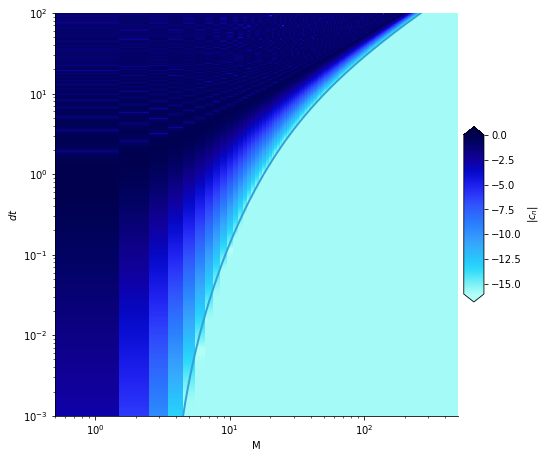

In [11]:
hv.QuadMesh((
    num_moments_array,
    dt_array,
    np.log(np.abs(coefs_array+np.finfo(float).eps))/np.log(10)
),
    kdims=['M', '$dt$'],
    vdims=hv.Dimension('z', label='$|c_n|$', range=(np.log(accuracy)/np.log(10), 0))
).opts(logy=True, logz=False, colorbar=True, fig_size=200) * \
hv.Curve((np.array([func(dt, *p_acc16) for dt in dt_array]), 
          dt_array)).opts(logy=True, logx=True)

## Result

Finally, these parameters give the best choice of `num_moments`
as a function of `dt` for
typical accuracy goals: `1e-8`, `1e-16`, `1e-32`.

```python
'p_acc8 = [0.42464678, 0.33500138, 2.00044861, 0.07265139]'
'p_acc16 = [0.34310197, 0.33722835, 2.01232381, 0.08868359]'
'p_acc32 = [0.28132266, 0.32958046, 2.04428473, 0.09146841]'

From the scaling analysis we can see that large time steps are possible, and require a proportionally larger amount of moments in the KPM expansion.

Smaller timesteps have a slight overhead in the number of moments:
$m^*=4$ for very small time steps of $10^{-3}$ but only $m^*=6$ for a ten times larger time step $10^{-2}$.

Thus, it is more convenient -in terms of performance- to make one big time step, rather than many subsequent smaller time steps.

Nevertheless, it is still fairly efficient to make many time steps for visualizing the time evolution.